<a href="https://colab.research.google.com/github/rexbrahh/Optimization-of-Machine-Learning-Models-for-Prediction-of-Personal-Loan-Default-Rate/blob/main/Homework3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Sheet 3



In [ ]:
import sys
assert sys.version_info >=(3,5)
import sklearn
assert sklearn.__version__ >="0.20"
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_ext4nsion, dpi=resolution)


In this problem sheet, you are expected to apply the following methods for a simplified model in finance trading signal classification using the average prices of different period:
- Decision Tree ;
- Bagging ;
- Random Forest ;
- Boost.

#### Suppose Bob is a speculator in the stock market, who would like to try a strategy based on several average prices of different period. We know that

- Bob does not want to take the long run risk, neither does he want to pay too much commission. As a result, once he is sure to take action, he will open a position and then holding it for 3 days, then close the position.
- Bob wants to focus on simple technical index. He will only analyse the trading signal by using the average prices of different periods.
- Bob only consult the **closed price** of each day.

### Question 1
- Suppose we are in day n. Write down the formula for
    - Find a formula for the 7 day average (i.e. the average price of day n-6,n-5,...,n)
    - Find a function that takes n as input, and output
    
      - 1, if the price on day n+3 is larger than 1.01 times the price on day n,
      - -1, if the price on day n+3 is less than 0.99 times the price on day n, and
      - 0 otherwise



Answer:
  1. Assuming that P(n) represents the price of day n , we can get the average price of the 7 days is (P(n)+P(n+1)+P(n+2)+...+P(n+6))/7
  
  2. please refer to the code below

In [ ]:
import pandas as pd

df = pd.read_csv(path)
p = df['open']  #assuming that we only take the prices in the 'open' column for example
n = 0


def a_lil_function(n):
  for n in p:
    if p[n+3] > 1.01*p[n]:
      print('1')
    else:
      if p[n+3] < 0.99*p[n]:
        print('-1')
      else:
        print('0')
  return(n)

FileNotFoundError: ignored

### Question 2
- Import the S&P500 stocks price datas (all_stocks_5yr.csv) as pandas Dataframe into your notebook, from the source dataset: https://www.kaggle.com/camnugent/sandp500, name this data frame as "sp500".


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd

sp500 = pd.read_csv('all_stocks_5yr.csv')


### Question 3
Extract the data for Apple. Based on the functions in Question 1,
- For each date n, associate the following **features** :
    - The 5 days averge
    - The 10 days average
    - The 15 days average
    - The 30 days average
    - The 60 days average
    - The 180 days average
(Note that for some dates you cannot associate one or some of the averages, if the date is too early)


- For each date n, associate a **label**, based on the comparation of prices in day n and in n+3,

In [ ]:
grouped = sp500.groupby(sp500.Name)
apple = grouped.get_group('AAPL')

apple

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
2513,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
2514,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
2515,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
2516,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [ ]:
import numpy as np

avg_5 = []
avg_10 = []
avg_15 = []
avg_30 = []
avg_60 = []
avg_price = []
for i in (1, 1259):
  avg_price[i] = (sp500['open'][i] + sp500['high'][i] + sp500['low'][i] + sp500['close'][i])/4
  if i >= 5:
    sum = 0
    for j in (1 ,4):
      sum = sum + avg_price[i-j]
    avg_5[i] = sum/5
  if i >= 10:
    sum = 0
    for j in (1,9):
      sum = sum + avg_price[i-j]
    avg_10[i] = sum/10
  if i >= 15:
    sum = 0
    for j in (1,14):
      sum = sum + avg_price[i-j]
    avg_15[i] = sum/15
  if i >= 30:
    sum = 0
    for j in (1,29):
      sum = sum + avg_price[i-j]
    avg_30[i] = sum/30
  if i >= 60:
    sum = 0
    for j in (1,59):
      sum = sum +avg_price[i-j]
    avg_60[i] = sum/60

print(avg_5)
print(avg_10)
print(avg_15)
print(avg_30)
print(avg_60)

### Question 4
Train the decision tree using
- Gini;
- Entropy.

and report the decision diagram respectively.

In [ ]:
#from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

X =
y =

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

from sklearn import tree
tree.plot_tree(tree_clf)

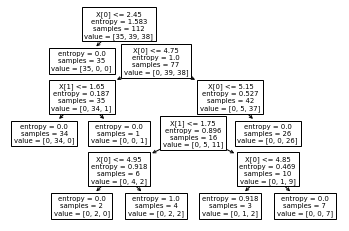

In [ ]:
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
tree_clf.fit(X_train,y_train)

tree.plot_tree(tree_clf)

y_pred = tree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


### Question 5

Use the bagging to train an ensemble of 500 trees for the same classification problem. Does that improve the prediction?  


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


### Question 6

Now use the random forest classifier with the number of estimater = 500, report the feature importances.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
rnd_clf.feature_importances_

array([0.52376228, 0.47623772])

### Question 7

Now try the [gradient boost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for the same problem.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gdb_clf = GradientBoostingClassifier(n_estimators=500,
                                     max_depth = 5,
                                     random_state=42
                                     )
gdb_clf.fit(X_train, y_train)

y_pred_gdb = gdb_clf.predict(X_test)

### Question 8

Now on day n, using the Gradient boost regessor from the library XGBoost (see p208 of textbook) to predict the price of n+3 by using the same average features as in Question 7.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

